In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


In [8]:
df = pd.read_csv('enem_2019.csv')
df

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,1,0,0,0,0,1,...,7,<= 998.00,472.9,466.0,497.3,369.1,780.0,PA,SANTARÉM,1506807
1,2,16,F,Cursando,1,1,0,0,0,1,...,5,<= 998.00,358.9,495.4,482.3,416.5,600.0,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,3,0,0,0,0,1,...,3,998.00 até 1497.00,574.2,538.7,582.6,571.5,640.0,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,2,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,1,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,1,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408
5095267,5095268,18,F,Concluído,1,0,0,0,0,1,...,5,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806
5095268,5095269,16,M,Cursando,1,1,0,0,0,1,...,6,4990.00 até 5988.00,458.8,380.6,493.1,396.7,800.0,BA,SALVADOR,2927408


In [9]:
# Filtrar as mulheres com nota redação maior que 500
df_mulheres = df[(df['sexo'] == 'F') & (df['nota_redacao'] > 950)][['idade','nota_redacao', 'estado']]

In [13]:
# Criar a coluna 'faixa_idade' - ADICIONADO
# Substitua as condições pelos seus critérios de faixas de idade
df_mulheres['faixa_idade'] = pd.cut(df_mulheres['idade'], bins=[0, 18, 25, 35, 100], labels=['<18', '18-25', '25-35', '35+']) 

In [10]:
# Fazer o teste anova
anova = sm.ols('nota_redacao ~ C(idade) * C(estado)', data=df_mulheres)
resultados = anova.fit()

# Imprimir resultados anova
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:           nota_redacao   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7039
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               1.00
Time:                        21:19:44   Log-Likelihood:                -87680.
No. Observations:               24422   AIC:                         1.764e+05
Df Residuals:                   23887   BIC:                         1.808e+05
Df Model:                         534                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

C:\Users\Anutcha\AppData\Local\Temp\ipykernel_692\3670129286.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_notas = df_mulheres.groupby(['faixa_idade', 'estado'])['nota_redacao'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

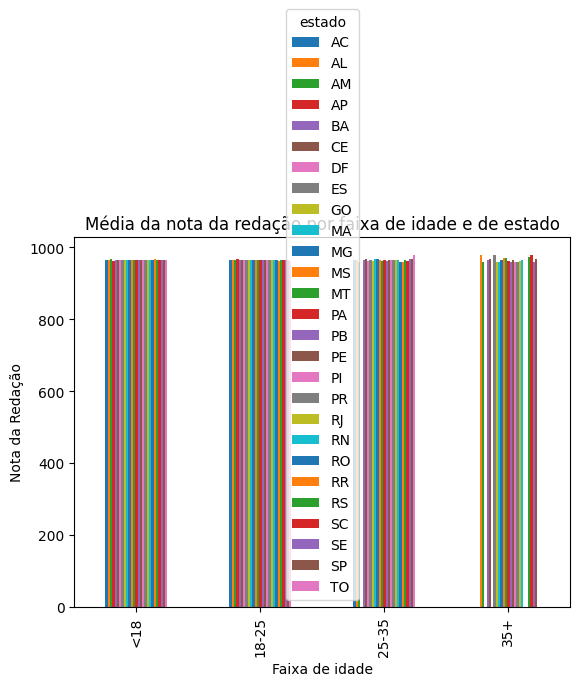

In [29]:
media_notas = df_mulheres.groupby(['faixa_idade', 'estado'])['nota_redacao'].mean().unstack()
media_notas.plot(kind='bar')


plt.xlabel('Faixa de idade')
plt.ylabel('Nota da Redação')
plt.title('Média da nota da redação por faixa de idade e de estado')
plt.show()